### Measures
 - Accuracy
 - Precision
 - Recall
 - F1 Score
 - AUC-ROC

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
import re

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings("ignore")

In C:\Users\Mirna Elizondo\anaconda3\envs\condaEnv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Mirna Elizondo\anaconda3\envs\condaEnv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Mirna Elizondo\anaconda3\envs\condaEnv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Mirna Elizondo\anaconda3\envs\condaEnv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Mirna Elizondo\anaconda3\envs\condaEnv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was depr

In [2]:
df = pd.read_csv('../data/diabetes_data_encoded.csv').drop(columns=["Unnamed: 0"], axis=1)

In [3]:
df.columns = [re.sub(r'[^\w\s]', '', col) for col in df.columns]
df.columns = [re.sub(r'[_]', ' ', col) for col in df.columns]
df.dtypes.unique()

array([dtype('int64')], dtype=object)

In [4]:
print(df.shape)

(97916, 1446)


In [5]:
readmit = df['readmitted'].value_counts()

# Print the counts
print("Occurrences of Readmitted:")
print("Value 0:", readmit[0])
print("Value 1:", readmit[1])
print('%:',readmit[1]/readmit[0])

Occurrences of Readmitted:
Value 0: 86950
Value 1: 10966
%: 0.12611845888441633


In [6]:
X = df.drop('readmitted', axis=1)
y = df['readmitted'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

In [8]:
rfc= RandomForestClassifier(random_state=42)
rfc.fit(X_train_smote, y_train_smote)
rfc_predictions = rfc.predict(X_val) 
print(classification_report(y_val, rfc_predictions))
print(confusion_matrix(y_val, rfc_predictions))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     17405
           1       0.27      0.03      0.06      2179

    accuracy                           0.88     19584
   macro avg       0.58      0.51      0.50     19584
weighted avg       0.82      0.88      0.84     19584

[[17214   191]
 [ 2109    70]]


In [9]:
report = classification_report(y_val, rfc_predictions, output_dict=True)
conf_matrix = confusion_matrix(y_val, rfc_predictions)

# Extract metrics from classification report
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
accuracy = report['accuracy']

# Create a DataFrame to store the metrics
data = {
    'Sampling Technique' : 'Smote-RFC',
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'Accuracy': accuracy,
    'Confusion Matrix': [conf_matrix]
}

metrics_df = pd.DataFrame(data)
print(metrics_df)

  Sampling Technique  Precision    Recall  F1 Score  Accuracy  \
0          Smote-RFC   0.821576  0.882557  0.839465  0.882557   

             Confusion Matrix  
0  [[17214, 191], [2109, 70]]  


In [10]:
rfc= RandomForestClassifier(random_state=42)
rfc.fit(X_train_under, y_train_under)
rfc_predictions = rfc.predict(X_val) 
print(classification_report(y_val, rfc_predictions))
print(confusion_matrix(y_val, rfc_predictions))

              precision    recall  f1-score   support

           0       0.92      0.62      0.74     17405
           1       0.16      0.59      0.25      2179

    accuracy                           0.61     19584
   macro avg       0.54      0.60      0.50     19584
weighted avg       0.84      0.61      0.69     19584

[[10740  6665]
 [  894  1285]]


In [11]:
report = classification_report(y_val, rfc_predictions, output_dict=True)
conf_matrix = confusion_matrix(y_val, rfc_predictions)

# Extract metrics from classification report
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
accuracy = report['accuracy']

# Create a DataFrame to store the metrics
data = {
    'Sampling Technique' : 'Undersampled-RFC',
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'Accuracy': accuracy,
    'Confusion Matrix': [conf_matrix]
}

df = pd.DataFrame(data)
metrics_df = metrics_df.append(df, ignore_index=True)
print(metrics_df)

  Sampling Technique  Precision    Recall  F1 Score  Accuracy  \
0          Smote-RFC   0.821576  0.882557  0.839465  0.882557   
1   Undersampled-RFC   0.838426  0.614022  0.685624  0.614022   

               Confusion Matrix  
0    [[17214, 191], [2109, 70]]  
1  [[10740, 6665], [894, 1285]]  


In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

In [13]:
gbt = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
gbt.fit(X_train_smote,y_train_smote)
gbt_predictions = gbt.predict(X_val) 
print(classification_report(y_val, gbt_predictions))
print(confusion_matrix(y_val, gbt_predictions))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     17405
           1       0.17      0.09      0.12      2179

    accuracy                           0.85     19584
   macro avg       0.53      0.52      0.52     19584
weighted avg       0.81      0.85      0.83     19584

[[16439   966]
 [ 1976   203]]


In [14]:
report = classification_report(y_val, gbt_predictions, output_dict=True)
conf_matrix = confusion_matrix(y_val, gbt_predictions)

# Extract metrics from classification report
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
accuracy = report['accuracy']

# Create a DataFrame to store the metrics
data = {
    'Sampling Technique' : 'Smote-GBT',
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'Accuracy': accuracy,
    'Confusion Matrix': [conf_matrix]
}

df = pd.DataFrame(data)
metrics_df = metrics_df.append(df, ignore_index=True)
print(metrics_df)

  Sampling Technique  Precision    Recall  F1 Score  Accuracy  \
0          Smote-RFC   0.821576  0.882557  0.839465  0.882557   
1   Undersampled-RFC   0.838426  0.614022  0.685624  0.614022   
2          Smote-GBT   0.812692  0.849775  0.829234  0.849775   

               Confusion Matrix  
0    [[17214, 191], [2109, 70]]  
1  [[10740, 6665], [894, 1285]]  
2   [[16439, 966], [1976, 203]]  


In [15]:
gbt = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
gbt.fit(X_train_under,y_train_under)
gbt_predictions = gbt.predict(X_val) 
print(classification_report(y_val, gbt_predictions))
print(confusion_matrix(y_val, gbt_predictions))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76     17405
           1       0.17      0.58      0.26      2179

    accuracy                           0.64     19584
   macro avg       0.55      0.61      0.51     19584
weighted avg       0.84      0.64      0.70     19584

[[11248  6157]
 [  926  1253]]


In [16]:
report = classification_report(y_val, gbt_predictions, output_dict=True)
conf_matrix = confusion_matrix(y_val, gbt_predictions)

# Extract metrics from classification report
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
accuracy = report['accuracy']

# Create a DataFrame to store the metrics
data = {
    'Sampling Technique' : 'Undersampled-GBT',
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'Accuracy': accuracy,
    'Confusion Matrix': [conf_matrix]
}

df = pd.DataFrame(data)
metrics_df = metrics_df.append(df, ignore_index=True)
print(metrics_df)

  Sampling Technique  Precision    Recall  F1 Score  Accuracy  \
0          Smote-RFC   0.821576  0.882557  0.839465  0.882557   
1   Undersampled-RFC   0.838426  0.614022  0.685624  0.614022   
2          Smote-GBT   0.812692  0.849775  0.829234  0.849775   
3   Undersampled-GBT   0.839949  0.638327  0.704997  0.638327   

               Confusion Matrix  
0    [[17214, 191], [2109, 70]]  
1  [[10740, 6665], [894, 1285]]  
2   [[16439, 966], [1976, 203]]  
3  [[11248, 6157], [926, 1253]]  


In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

In [18]:
neg_to_pos_ratio = (y_train == 0).sum() / (y_train == 1).sum()
params = {
    'objective': 'binary',
    'metric': 'mae',
    'min_child_weight': 60,  # Adjust this value and experiment
    'random_state': 42,
    'max_delta_step': 1,
    'verbose': -1,
    'max_depth': 10, 
}

train_data = lgb.Dataset(X_train_under, label=y_train_under)
val_data = lgb.Dataset(X_val, label=y_val)

num_round = 200
bst = lgb.train(params, train_data, num_round, valid_sets=[val_data], early_stopping_rounds=10)

y_pred_proba = bst.predict(X_val)

y_pred_class = [1 if pred > 0.5 else 0 for pred in y_pred_proba]

[1]	valid_0's l1: 0.496384
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 0.493221
[3]	valid_0's l1: 0.49027
[4]	valid_0's l1: 0.48767
[5]	valid_0's l1: 0.485349
[6]	valid_0's l1: 0.483221
[7]	valid_0's l1: 0.481325
[8]	valid_0's l1: 0.479491
[9]	valid_0's l1: 0.477913
[10]	valid_0's l1: 0.47651
[11]	valid_0's l1: 0.475261
[12]	valid_0's l1: 0.473989
[13]	valid_0's l1: 0.472834
[14]	valid_0's l1: 0.471868
[15]	valid_0's l1: 0.470892
[16]	valid_0's l1: 0.470125
[17]	valid_0's l1: 0.4693
[18]	valid_0's l1: 0.468634
[19]	valid_0's l1: 0.467998
[20]	valid_0's l1: 0.467418
[21]	valid_0's l1: 0.466871
[22]	valid_0's l1: 0.466374
[23]	valid_0's l1: 0.465951
[24]	valid_0's l1: 0.465395
[25]	valid_0's l1: 0.465071
[26]	valid_0's l1: 0.46483
[27]	valid_0's l1: 0.464475
[28]	valid_0's l1: 0.4641
[29]	valid_0's l1: 0.463895
[30]	valid_0's l1: 0.463543
[31]	valid_0's l1: 0.463237
[32]	valid_0's l1: 0.463069
[33]	valid_0's l1: 0.462708
[34]	valid_0's l1: 0.462595
[35]

In [19]:
print(classification_report(y_val, y_pred_class, zero_division=0))
print(confusion_matrix(y_val, y_pred_class))

              precision    recall  f1-score   support

           0       0.92      0.62      0.74     17405
           1       0.16      0.60      0.26      2179

    accuracy                           0.62     19584
   macro avg       0.54      0.61      0.50     19584
weighted avg       0.84      0.62      0.69     19584

[[10746  6659]
 [  878  1301]]


In [20]:
report = classification_report(y_val, gbt_predictions, output_dict=True)
conf_matrix = confusion_matrix(y_val, gbt_predictions)

# Extract metrics from classification report
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
accuracy = report['accuracy']

# Create a DataFrame to store the metrics
data = {
    'Sampling Technique' : 'Undersampled-LGBM',
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'Accuracy': accuracy,
    'Confusion Matrix': [conf_matrix]
}

df = pd.DataFrame(data)
metrics_df = metrics_df.append(df, ignore_index=True)
print(metrics_df)

  Sampling Technique  Precision    Recall  F1 Score  Accuracy  \
0          Smote-RFC   0.821576  0.882557  0.839465  0.882557   
1   Undersampled-RFC   0.838426  0.614022  0.685624  0.614022   
2          Smote-GBT   0.812692  0.849775  0.829234  0.849775   
3   Undersampled-GBT   0.839949  0.638327  0.704997  0.638327   
4  Undersampled-LGBM   0.839949  0.638327  0.704997  0.638327   

               Confusion Matrix  
0    [[17214, 191], [2109, 70]]  
1  [[10740, 6665], [894, 1285]]  
2   [[16439, 966], [1976, 203]]  
3  [[11248, 6157], [926, 1253]]  
4  [[11248, 6157], [926, 1253]]  


In [21]:
train_data = lgb.Dataset(X_train_smote, label=y_train_smote)
val_data = lgb.Dataset(X_val, label=y_val)

num_round = 200
bst = lgb.train(params, train_data, num_round, valid_sets=[val_data], early_stopping_rounds=10)

y_pred_proba = bst.predict(X_val)

y_pred_class = [1 if pred > 0.5 else 0 for pred in y_pred_proba]

[1]	valid_0's l1: 0.481273
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 0.46306
[3]	valid_0's l1: 0.445523
[4]	valid_0's l1: 0.428388
[5]	valid_0's l1: 0.412876
[6]	valid_0's l1: 0.398836
[7]	valid_0's l1: 0.385631
[8]	valid_0's l1: 0.373618
[9]	valid_0's l1: 0.362689
[10]	valid_0's l1: 0.352916
[11]	valid_0's l1: 0.343777
[12]	valid_0's l1: 0.335468
[13]	valid_0's l1: 0.327837
[14]	valid_0's l1: 0.320311
[15]	valid_0's l1: 0.313261
[16]	valid_0's l1: 0.306977
[17]	valid_0's l1: 0.300955
[18]	valid_0's l1: 0.296023
[19]	valid_0's l1: 0.291247
[20]	valid_0's l1: 0.286337
[21]	valid_0's l1: 0.281495
[22]	valid_0's l1: 0.277611
[23]	valid_0's l1: 0.273762
[24]	valid_0's l1: 0.270742
[25]	valid_0's l1: 0.268166
[26]	valid_0's l1: 0.265422
[27]	valid_0's l1: 0.262913
[28]	valid_0's l1: 0.260227
[29]	valid_0's l1: 0.257709
[30]	valid_0's l1: 0.255388
[31]	valid_0's l1: 0.254364
[32]	valid_0's l1: 0.251888
[33]	valid_0's l1: 0.250725
[34]	valid_0's l1: 0.2486

In [22]:
print(classification_report(y_val, y_pred_class, zero_division=0))
print(confusion_matrix(y_val, y_pred_class))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17405
           1       0.50      0.02      0.04      2179

    accuracy                           0.89     19584
   macro avg       0.70      0.51      0.49     19584
weighted avg       0.85      0.89      0.84     19584

[[17354    51]
 [ 2128    51]]


In [23]:
report = classification_report(y_val, y_pred_class, output_dict=True)
conf_matrix = confusion_matrix(y_val, y_pred_class)

# Extract metrics from classification report
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
accuracy = report['accuracy']

# Create a DataFrame to store the metrics
data = {
    'Sampling Technique' : 'Smote-LGBM',
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'Accuracy': accuracy,
    'Confusion Matrix': [conf_matrix]
}

df = pd.DataFrame(data)
metrics_df = metrics_df.append(df, ignore_index=True)
print(metrics_df)

  Sampling Technique  Precision    Recall  F1 Score  Accuracy  \
0          Smote-RFC   0.821576  0.882557  0.839465  0.882557   
1   Undersampled-RFC   0.838426  0.614022  0.685624  0.614022   
2          Smote-GBT   0.812692  0.849775  0.829234  0.849775   
3   Undersampled-GBT   0.839949  0.638327  0.704997  0.638327   
4  Undersampled-LGBM   0.839949  0.638327  0.704997  0.638327   
5         Smote-LGBM   0.847292  0.888736  0.841211  0.888736   

               Confusion Matrix  
0    [[17214, 191], [2109, 70]]  
1  [[10740, 6665], [894, 1285]]  
2   [[16439, 966], [1976, 203]]  
3  [[11248, 6157], [926, 1253]]  
4  [[11248, 6157], [926, 1253]]  
5     [[17354, 51], [2128, 51]]  


In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

In [25]:
neg_to_pos_ratio = (y_train == 0).sum() / (y_train == 1).sum()
params_xgb = {
    'objective': 'binary:logistic',
    'eval_metric': 'mae',  
    'min_child_weight': 60, 
    'random_state': 42,
    'max_depth': 10,
    'verbosity': 0
}

xgb_pipeline = make_pipeline(XGBClassifier(**params_xgb))
xgb_pipeline.fit(X_train_under, y_train_under)
y_pred_proba_xgb = xgb_pipeline.predict_proba(X_val)[:, 1]
y_pred_class_xgb = [1 if pred > 0.5 else 0 for pred in y_pred_proba_xgb]

print(classification_report(y_val, y_pred_class_xgb, zero_division=0))
print(confusion_matrix(y_val, y_pred_class_xgb))

              precision    recall  f1-score   support

           0       0.92      0.62      0.74     17405
           1       0.16      0.59      0.25      2179

    accuracy                           0.61     19584
   macro avg       0.54      0.60      0.50     19584
weighted avg       0.84      0.61      0.68     19584

[[10708  6697]
 [  891  1288]]


In [26]:
report = classification_report(y_val, y_pred_class_xgb, output_dict=True)
conf_matrix = confusion_matrix(y_val, y_pred_class_xgb)

# Extract metrics from classification report
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
accuracy = report['accuracy']

# Create a DataFrame to store the metrics
data = {
    'Sampling Technique' : 'Undersampled-XGBoost',
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'Accuracy': accuracy,
    'Confusion Matrix': [conf_matrix]
}

df = pd.DataFrame(data)
metrics_df = metrics_df.append(df, ignore_index=True)
print(metrics_df)

     Sampling Technique  Precision    Recall  F1 Score  Accuracy  \
0             Smote-RFC   0.821576  0.882557  0.839465  0.882557   
1      Undersampled-RFC   0.838426  0.614022  0.685624  0.614022   
2             Smote-GBT   0.812692  0.849775  0.829234  0.849775   
3      Undersampled-GBT   0.839949  0.638327  0.704997  0.638327   
4     Undersampled-LGBM   0.839949  0.638327  0.704997  0.638327   
5            Smote-LGBM   0.847292  0.888736  0.841211  0.888736   
6  Undersampled-XGBoost   0.838413  0.612541  0.684425  0.612541   

               Confusion Matrix  
0    [[17214, 191], [2109, 70]]  
1  [[10740, 6665], [894, 1285]]  
2   [[16439, 966], [1976, 203]]  
3  [[11248, 6157], [926, 1253]]  
4  [[11248, 6157], [926, 1253]]  
5     [[17354, 51], [2128, 51]]  
6  [[10708, 6697], [891, 1288]]  


In [27]:
neg_to_pos_ratio = (y_train == 0).sum() / (y_train == 1).sum()
params_xgb = {
    'objective': 'binary:logistic',
    'eval_metric': 'mae',  
    'min_child_weight': 60, 
    'random_state': 42,
    'max_depth': 10,
    'verbosity': 0
}

xgb_pipeline = make_pipeline(XGBClassifier(**params_xgb))
xgb_pipeline.fit(X_train_smote, y_train_smote)
y_pred_proba_xgb = xgb_pipeline.predict_proba(X_val)[:, 1]
y_pred_class_xgb = [1 if pred > 0.5 else 0 for pred in y_pred_proba_xgb]

print(classification_report(y_val, y_pred_class_xgb, zero_division=0))
print(confusion_matrix(y_val, y_pred_class_xgb))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     17405
           1       0.36      0.03      0.05      2179

    accuracy                           0.89     19584
   macro avg       0.63      0.51      0.50     19584
weighted avg       0.83      0.89      0.84     19584

[[17299   106]
 [ 2119    60]]


In [28]:
report = classification_report(y_val, y_pred_class_xgb, output_dict=True)
conf_matrix = confusion_matrix(y_val, y_pred_class_xgb)

# Extract metrics from classification report
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
accuracy = report['accuracy']

# Create a DataFrame to store the metrics
data = {
    'Sampling Technique' : 'Smote-XGBoost',
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'Accuracy': accuracy,
    'Confusion Matrix': [conf_matrix]
}

df = pd.DataFrame(data)
metrics_df = metrics_df.append(df, ignore_index=True)
print(metrics_df)

     Sampling Technique  Precision    Recall  F1 Score  Accuracy  \
0             Smote-RFC   0.821576  0.882557  0.839465  0.882557   
1      Undersampled-RFC   0.838426  0.614022  0.685624  0.614022   
2             Smote-GBT   0.812692  0.849775  0.829234  0.849775   
3      Undersampled-GBT   0.839949  0.638327  0.704997  0.638327   
4     Undersampled-LGBM   0.839949  0.638327  0.704997  0.638327   
5            Smote-LGBM   0.847292  0.888736  0.841211  0.888736   
6  Undersampled-XGBoost   0.838413  0.612541  0.684425  0.612541   
7         Smote-XGBoost   0.831968  0.886387  0.840728  0.886387   

               Confusion Matrix  
0    [[17214, 191], [2109, 70]]  
1  [[10740, 6665], [894, 1285]]  
2   [[16439, 966], [1976, 203]]  
3  [[11248, 6157], [926, 1253]]  
4  [[11248, 6157], [926, 1253]]  
5     [[17354, 51], [2128, 51]]  
6  [[10708, 6697], [891, 1288]]  
7    [[17299, 106], [2119, 60]]  


In [29]:
neg_to_pos_ratio = (y_train == 0).sum() / (y_train == 1).sum()
params_cat = {
    'random_seed': 42,
    'depth': 10, 
    'verbose': 0
}

catboost = CatBoostClassifier(**params_cat)
catboost.fit(X_train_under, y_train_under)
y_pred_proba_cat = catboost.predict_proba(X_val)[:, 1]
y_pred_class_cat = [1 if pred > 0.5 else 0 for pred in y_pred_proba_cat]
print(classification_report(y_val, y_pred_class_xgb, zero_division=0))
print(confusion_matrix(y_val, y_pred_class_xgb))


              precision    recall  f1-score   support

           0       0.89      0.99      0.94     17405
           1       0.36      0.03      0.05      2179

    accuracy                           0.89     19584
   macro avg       0.63      0.51      0.50     19584
weighted avg       0.83      0.89      0.84     19584

[[17299   106]
 [ 2119    60]]


In [30]:
report = classification_report(y_val, y_pred_class_cat, output_dict=True)
conf_matrix = confusion_matrix(y_val, y_pred_class_cat)

# Extract metrics from classification report
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
accuracy = report['accuracy']

# Create a DataFrame to store the metrics
data = {
    'Sampling Technique' : 'Undersampled-CatBoost',
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'Accuracy': accuracy,
    'Confusion Matrix': [conf_matrix]
}

df = pd.DataFrame(data)
metrics_df = metrics_df.append(df, ignore_index=True)
print(metrics_df)

      Sampling Technique  Precision    Recall  F1 Score  Accuracy  \
0              Smote-RFC   0.821576  0.882557  0.839465  0.882557   
1       Undersampled-RFC   0.838426  0.614022  0.685624  0.614022   
2              Smote-GBT   0.812692  0.849775  0.829234  0.849775   
3       Undersampled-GBT   0.839949  0.638327  0.704997  0.638327   
4      Undersampled-LGBM   0.839949  0.638327  0.704997  0.638327   
5             Smote-LGBM   0.847292  0.888736  0.841211  0.888736   
6   Undersampled-XGBoost   0.838413  0.612541  0.684425  0.612541   
7          Smote-XGBoost   0.831968  0.886387  0.840728  0.886387   
8  Undersampled-CatBoost   0.840270  0.617239  0.688237  0.617239   

               Confusion Matrix  
0    [[17214, 191], [2109, 70]]  
1  [[10740, 6665], [894, 1285]]  
2   [[16439, 966], [1976, 203]]  
3  [[11248, 6157], [926, 1253]]  
4  [[11248, 6157], [926, 1253]]  
5     [[17354, 51], [2128, 51]]  
6  [[10708, 6697], [891, 1288]]  
7    [[17299, 106], [2119, 60]]  
8  

In [31]:
neg_to_pos_ratio = (y_train == 0).sum() / (y_train == 1).sum()
params_cat = {
    'random_seed': 42,
    'depth': 10, 
    'verbose': 0
}

catboost = CatBoostClassifier(**params_cat)
catboost.fit(X_train_smote, y_train_smote)
y_pred_proba_cat = catboost.predict_proba(X_val)[:, 1]
y_pred_class_cat = [1 if pred > 0.5 else 0 for pred in y_pred_proba_cat]
print(classification_report(y_val, y_pred_class_xgb, zero_division=0))
print(confusion_matrix(y_val, y_pred_class_xgb))


              precision    recall  f1-score   support

           0       0.89      0.99      0.94     17405
           1       0.36      0.03      0.05      2179

    accuracy                           0.89     19584
   macro avg       0.63      0.51      0.50     19584
weighted avg       0.83      0.89      0.84     19584

[[17299   106]
 [ 2119    60]]


In [32]:
report = classification_report(y_val, y_pred_class_cat, output_dict=True)
conf_matrix = confusion_matrix(y_val, y_pred_class_cat)

# Extract metrics from classification report
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
accuracy = report['accuracy']

# Create a DataFrame to store the metrics
data = {
    'Sampling Technique' : 'Smote-CatBoost',
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'Accuracy': accuracy,
    'Confusion Matrix': [conf_matrix]
}

df = pd.DataFrame(data)
metrics_df = metrics_df.append(df, ignore_index=True)
print(metrics_df)

      Sampling Technique  Precision    Recall  F1 Score  Accuracy  \
0              Smote-RFC   0.821576  0.882557  0.839465  0.882557   
1       Undersampled-RFC   0.838426  0.614022  0.685624  0.614022   
2              Smote-GBT   0.812692  0.849775  0.829234  0.849775   
3       Undersampled-GBT   0.839949  0.638327  0.704997  0.638327   
4      Undersampled-LGBM   0.839949  0.638327  0.704997  0.638327   
5             Smote-LGBM   0.847292  0.888736  0.841211  0.888736   
6   Undersampled-XGBoost   0.838413  0.612541  0.684425  0.612541   
7          Smote-XGBoost   0.831968  0.886387  0.840728  0.886387   
8  Undersampled-CatBoost   0.840270  0.617239  0.688237  0.617239   
9         Smote-CatBoost   0.844056  0.888123  0.843076  0.888123   

               Confusion Matrix  
0    [[17214, 191], [2109, 70]]  
1  [[10740, 6665], [894, 1285]]  
2   [[16439, 966], [1976, 203]]  
3  [[11248, 6157], [926, 1253]]  
4  [[11248, 6157], [926, 1253]]  
5     [[17354, 51], [2128, 51]]  
6 

In [33]:
metrics_df

,Sampling Technique,Precision,Recall,F1 Score,Accuracy,Confusion Matrix
0,Smote-RFC,0.821576,0.882557,0.839465,0.882557,"[[17214, 191], [2109, 70]]"
1,Undersampled-RFC,0.838426,0.614022,0.685624,0.614022,"[[10740, 6665], [894, 1285]]"
2,Smote-GBT,0.812692,0.849775,0.829234,0.849775,"[[16439, 966], [1976, 203]]"
3,Undersampled-GBT,0.839949,0.638327,0.704997,0.638327,"[[11248, 6157], [926, 1253]]"
4,Undersampled-LGBM,0.839949,0.638327,0.704997,0.638327,"[[11248, 6157], [926, 1253]]"
5,Smote-LGBM,0.847292,0.888736,0.841211,0.888736,"[[17354, 51], [2128, 51]]"
6,Undersampled-XGBoost,0.838413,0.612541,0.684425,0.612541,"[[10708, 6697], [891, 1288]]"
7,Smote-XGBoost,0.831968,0.886387,0.840728,0.886387,"[[17299, 106], [2119, 60]]"
8,Undersampled-CatBoost,0.840270,0.617239,0.688237,0.617239,"[[10785, 6620], [876, 1303]]"
9,Smote-CatBoost,0.844056,0.888123,0.843076,0.888123,"[[17317, 88], [2103, 76]]"


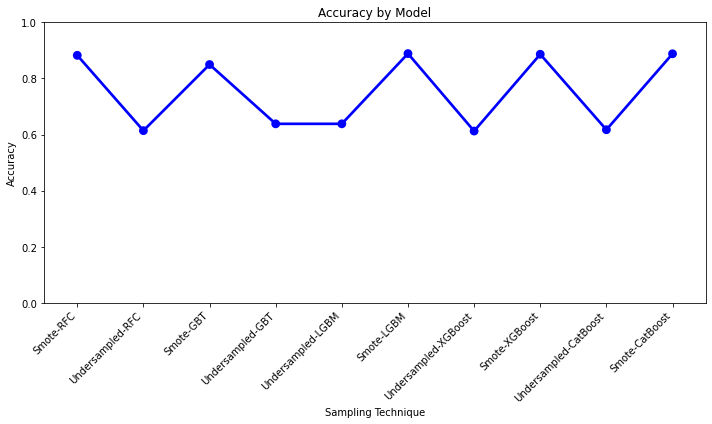

In [36]:
models = metrics_df['Sampling Technique']
accuracy = metrics_df['Accuracy']

plt.figure(figsize=(10, 6))

sns.pointplot(x=models, y=accuracy, color='blue', markers='o')

plt.ylabel('Accuracy')
plt.title('Accuracy by Model')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('../figs/accuracySampling.png')
plt.show()


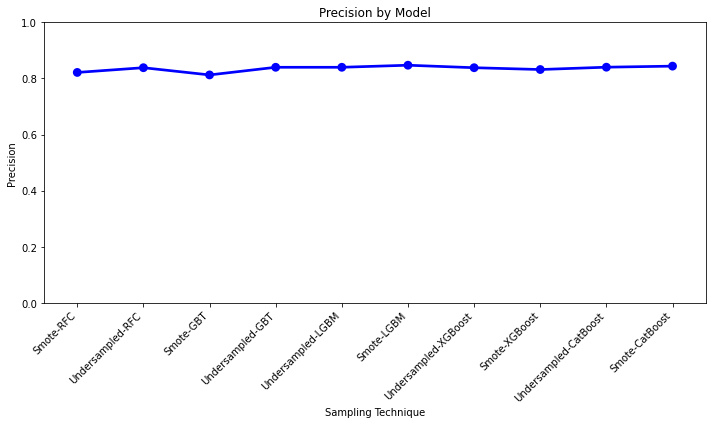

In [37]:
models = metrics_df['Sampling Technique']
precision = metrics_df['Precision']

plt.figure(figsize=(10, 6))

sns.pointplot(x=models, y=precision, color='blue', markers='o')

plt.ylabel('Precision')
plt.title('Precision by Model')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('../figs/precisionSampling.png')
plt.show()


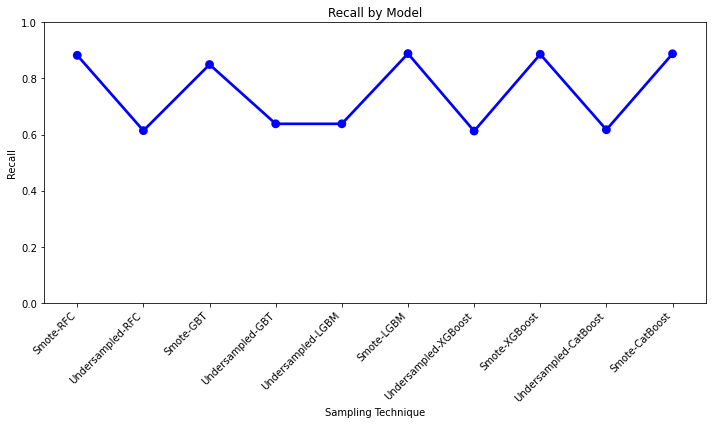

In [38]:
models = metrics_df['Sampling Technique']
recall = metrics_df['Recall']

plt.figure(figsize=(10, 6))

sns.pointplot(x=models, y=recall, color='blue', markers='o')

plt.ylabel('Recall')
plt.title('Recall by Model')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('../figs/recallSampling.png')
plt.show()


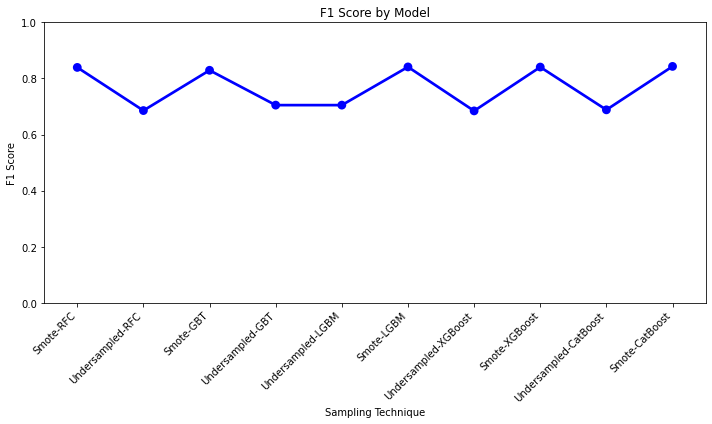

In [39]:
models = metrics_df['Sampling Technique']
f1 = metrics_df['F1 Score']

plt.figure(figsize=(10, 6))

sns.pointplot(x=models, y=f1, color='blue', markers='o')

plt.ylabel('F1 Score')
plt.title('F1 Score by Model')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('../figs/f1Sampling.png')
plt.show()
